<a href="https://colab.research.google.com/github/raquelcreis/CastoresIndomaveis/blob/master/C%C3%B3pia_de_lista002_pandas_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 002 - Pandas, Matplotlib, GeoPandas e Folium.


1. Monte um dataframe contendo todas as informações dos arquivos csv em 'data/transito'.

In [1]:
import pandas as pd

# arquivos csv separados em meses (de jan a jul)

meses = ["janeiro","fevereiro","marco","abril","maio","junho","julho"]
path = "https://raw.githubusercontent.com/raquelcreis/CastoresIndomaveis/master/data/transito/"
csv_str = ".csv"
lista_dfs = []

for mes in meses:
  df_mes = pd.read_csv(path+mes+csv_str,sep=';',low_memory=False)
  lista_dfs.append(df_mes) 

df = pd.concat(lista_dfs,ignore_index=True)

df.head()

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
0,7234-0,"Em movimento, deixar de manter acesa a luz bai...",Condutor,Automóvel,01/01/2020,00:00,DF004,14,Sentido Decrescente,NaN,-1.582.128.023,-4.788.254.337,Média
1,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,UTILITARIO,01/01/2020,00:00,"DF-025 (EPDB) KM 1,3 (ALT. FLORICULTURAS) SENT...",NaN,NaN,NaN,NaN,NaN,Média
2,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/01/2020,00:01,"DF-001(EPCT)Km 57,6 Sent. Rec. das Emas/Viadut...",NaN,NaN,NaN,NaN,NaN,Média
3,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/01/2020,00:01,"DF-001(EPCT)Km 65,5 Sent. Samambaia/Viaduto do...",NaN,NaN,NaN,NaN,NaN,Média
4,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/01/2020,00:03,"DF-075 (EPNB) KM 2,4 SENT. N. BAND / EPIA (DF-...",NaN,NaN,NaN,NaN,NaN,Média


In [2]:
df.shape

(500495, 13)

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500495 entries, 0 to 500494
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   tipo_infracao            500495 non-null  object
 1   descricao                500495 non-null  object
 2   tipo_infrator            500495 non-null  object
 3   tipo_veiculo             500328 non-null  object
 4   cometimento              500495 non-null  object
 5   hora_cometimento         500495 non-null  object
 6   auinf_local_rodovia      500448 non-null  object
 7   auinf_local_km           83575 non-null   object
 8   auinf_local_referencia   82404 non-null   object
 9   auinf_local_complemento  17867 non-null   object
 10  auinf_local_latitude     76044 non-null   object
 11  auinf_local_longitude    76044 non-null   object
 12  grav_tipo                500495 non-null  object
dtypes: object(13)
memory usage: 49.6+ MB


In [5]:
df.columns

Index(['tipo_infracao', 'descricao', 'tipo_infrator', 'tipo_veiculo',
       'cometimento', 'hora_cometimento', 'auinf_local_rodovia',
       'auinf_local_km', 'auinf_local_referencia', 'auinf_local_complemento',
       'auinf_local_latitude', 'auinf_local_longitude', 'grav_tipo'],
      dtype='object')

2. Quantos tipos diferentes de gravidade de infração exitem no dataset? Quais são?

In [7]:
df.grav_tipo.nunique()

4

In [8]:
df.grav_tipo.unique()

array(['Média', 'Gravíssima', 'Grave', 'Leve'], dtype=object)

3. Qual a hora do dia que mais se cometem infrações graves? Demonstre utilizando um gráfico de linhas.

In [47]:
# criada uma coluna que vai armazenar apenas a hora 

In [9]:
df['hora_cometimento_2'] = pd.to_datetime(df['hora_cometimento'],format='%H:%M').dt.hour

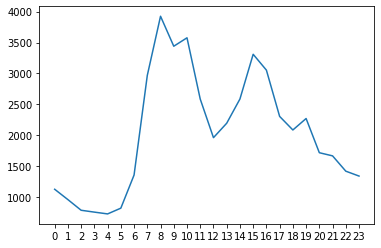

In [10]:
import matplotlib.pyplot as plt

mask = df.grav_tipo == 'Grave'

data_plot = df[mask].hora_cometimento_2.value_counts().sort_index()
x1 = range(24) #eixo x mostrando todas as horas

plt.plot(data_plot.index,data_plot.values)
plt.xticks(x1)
plt.show()

In [ ]:
#a hora que mais acontece infrações graves

In [11]:
horas = df[mask].hora_cometimento_2.value_counts()
horas.index[0]


8

4. Qual dia da semana que mais se cometem infrações leves? Demonstre utilizando um gráfico de linhas e colocando um texto no ponto máximo.

In [ ]:
# criando coluna de dia da semana

In [12]:
df['dia_semana'] = pd.to_datetime(df['cometimento'],format='%d/%m/%Y',yearfirst=True).dt.dayofweek
dias_semana = {0:'Segunda-Feira',1:'Terça-Feira',2:'Quarta-Feira',3:'Quinta-Feira',4:'Sexta-Feira',5:'Sábado',6:'Domingo'}

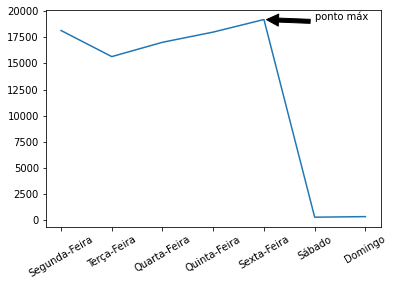

In [13]:
mask2 = df.grav_tipo == 'Leve'

data_plot2 = df[mask2].dia_semana.value_counts().sort_index()
data_plot2.index = data_plot2.index.map(dias_semana)
plot2_max = max(data_plot2.values)


plt.plot(data_plot2.index,data_plot2.values)
plt.annotate('ponto máx', xy=(4, 19201), xytext=(5, 19201),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.xticks(rotation=30)
plt.show()

5. Filtre o dataset pelo tipo de condutor 'pessoa jurídica', qual o tipo de infração mais comum? Em que horário ele mais acontece? Monte um subplot para demonstrar as duas informações utilizando gráficos.

In [ ]:
df.groupby('tipo_infrator')['tipo_infracao'].count()

In [ ]:
mask3 = df.tipo_infrator == 'Pessoa Jurídica'
df[mask3].tipo_infracao

In [ ]:
df[mask3].hora_cometimento_2

In [ ]:
#no dataset com 500495 observações, apenas 1 é de pessoa jurídica

6. Monte um subplot com 7 heatmaps (1 para cada mês) demonstrando a concentração da quantidade infrações por dia do mês e hora do dia (desconsidere os minutos).

In [ ]:
#criar coluna do dia

In [35]:
df['dia_cometimento'] = pd.to_datetime(df['cometimento'],format='%d/%m/%Y',yearfirst=True).dt.day

In [ ]:
#criar coluna do mes

In [36]:
df['mes_cometimento'] = pd.to_datetime(df['cometimento'],format='%d/%m/%Y',yearfirst=True).dt.month


7. Alguma bicicleta já tomou multa? Se sim, qual foi a gravidade?

In [14]:
df[df.tipo_veiculo == 'Bicicleta'].grav_tipo

235753    Grave
Name: grav_tipo, dtype: object

8. Utilizando regular expressions (biblioteca re) extraia a rodovia (DF-128, DF 459 etc) onde a infração foi cometida.

In [15]:
import re

df['auinf_local_rodovia'].fillna("NA",inplace = True)


In [73]:
p = r'DF.\d\d\d|DF\d\d\d'
df['rodovia'] = df['auinf_local_rodovia'].apply(lambda x: re.findall(p,x,re.I))

In [ ]:
def rodovias(pattern,string)
  match = re.search(pattern, string) 
    if match:
    return(match.group())
    else:
    return None



In [74]:
df.rodovia

0                  [DF004]
1         [DF-025, DF-003]
2                 [DF-001]
3                 [DF-001]
4         [DF-075, DF-003]
                ...       
500490            [DF-003]
500491    [DF-001, DF-075]
500492    [DF-085, DF-001]
500493    [DF-075, DF-003]
500494            [DF-003]
Name: rodovia, Length: 500495, dtype: object

In [18]:
df.rodovia.tail(20)

500475            [DF-095]
500476            [DF-075]
500477            [DF-075]
500478            [DF-003]
500479            [DF-095]
500480    [DF-085, DF-001]
500481            [DF-095]
500482            [DF-095]
500483    [DF-079, DF-085]
500484    [DF-035, DF-025]
500485            [DF-075]
500486    [DF-085, DF-003]
500487            [DF-075]
500488            [DF-075]
500489            [DF-075]
500490            [DF-003]
500491    [DF-001, DF-075]
500492    [DF-085, DF-001]
500493    [DF-075, DF-003]
500494            [DF-003]
Name: rodovia, dtype: object

In [20]:
df.auinf_local_rodovia.tail(20)

500475    DF-095 (EPCL) ESTRUTURAL KM 0,8 SENTIDO BIDIRE...
500476    DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...
500477    DF-075(EPNB)KM 02 SENTIDO N. BANDEIRANTE      ...
500478    DF-003 (EPIA) KM 21,0 SENTIDO SUL             ...
500479    DF-095  (EPCL) ESTRUTURAL  KM 4,5  SENTIDO BI...
500480    DF-085(EPTG) KM 7,9 SENTIDO DF-001(TAGUATINGA)...
500481    DF-095 (EPCL) ESTRUTURAL KM 6,8 SENTIDO BIDIRE...
500482    DF-095 (EPCL) ESTRUTURAL KM 6,8 SENTIDO BIDIRE...
500483    DF-079 (EPVP) KM 4  SENTIDO DF-085 (EPTG)    ...
500484    DF-035(EPCV) KM 0,4 SENTIDO DF-025(EPDB) - LAG...
500485    DF-075(EPNB)KM 02 SENTIDO N. BANDEIRANTE      ...
500486    DF-085 (EPTG) KM 9,0 SENTIDO DF-003(PLANO PILO...
500487    DF-075 (EPNB) KM 3,5 SENT. N. BAND. / RIACHO F...
500488    DF-075(EPNB) KM 02 SENTIDO SAMAMBAIA          ...
500489    DF-075 (EPNB) KM 4,4 SENT. N. BAND. / RIACHO F...
500490    DF-003(EPIA) KM 25,8 SENTIDO SUL              ...
500491    DF-001 (EPCT) KM 78,9 (PISTAO 

8. Leia as informações de cada rodovia utilizando o link abaixo e guarde em um dataframe.

'http://dados.df.gov.br/dataset/3cb44f4a-576c-45b8-8f13-ae94a6623277/resource/2bd0f48e-d3a1-47c6-bd12-83aed24e9461/download/2020-05-19-scr.csv'

In [29]:
df2 = pd.read_csv('http://dados.df.gov.br/dataset/3cb44f4a-576c-45b8-8f13-ae94a6623277/resource/2bd0f48e-d3a1-47c6-bd12-83aed24e9461/download/2020-05-19-scr.csv',sep=';',encoding='latin-1',low_memory=False)
df2

,RODOVIA,COD. TRECHO,INÍCIO,FIM,Km INÍCIO,Km FIM,EXTENSÃO,TP. RODOVIA,SITUAÇÃO,DESC. SITUAÇÃO,RESPONSÁVEL,DESC. RESPONSÁVEL,D.R,DESC. D.R,TMDA,LARG. PISTA,LARG. ACOSTAMENTO,MAT. REVESTIMENTO
0,BR010,010BDF0010,ENTR. BR-020 (A)/BR-030 (A)/DF-003(EPIA)DF-001...,ENTR. DF-440,0.0,2.5,2.5,Federal,DUP,Duplicado,DNIT,Departamento Nacional de Infra-Estrutura de Tr...,NaN,NaN,NaN,NaN,NaN,NaN
1,BR010,010BDF0015,ENTR. DF-440,ACESSO I A SOBRADINHO,2.5,6.0,3.5,Federal,DUP,Duplicado,DNIT,Departamento Nacional de Infra-Estrutura de Tr...,NaN,NaN,NaN,NaN,NaN,NaN
2,BR010,010BDF0016,ACESSO I A SOBRADINHO,ACESSO II A SOBRADINHO,6.0,8.4,2.4,Federal,DUP,Duplicado,DNIT,Departamento Nacional de Infra-Estrutura de Tr...,NaN,NaN,NaN,NaN,NaN,NaN
3,BR010,010BDF0018,ACESSO II A SOBRADINHO,ENTR. DF-230,8.4,18.8,10.4,Federal,DUP,Duplicado,DNIT,Departamento Nacional de Infra-Estrutura de Tr...,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN
4,BR010,010BDF0020,ENTR. DF-230,ENTR. DF-128,18.8,22.6,3.8,Federal,DUP,Duplicado,DNIT,Departamento Nacional de Infra-Estrutura de Tr...,1º DR,PRIMEIRO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,VC527,527EVC0010,ENTR. DF-445,ENTR. DF-430,0.0,6.9,6.9,Vicinal,IMP,Implantado,DERDF,Departamento de Estradas de Rodagem do DF,5º DR,QUINTO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN
629,VC533,533EVC0010,ENTR. BR-080/BR-251,DIVISA DF/GO,0.0,3.7,3.7,Vicinal,PAV,Pavimentada,DERDF,Departamento de Estradas de Rodagem do DF,5º DR,QUINTO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN
630,VC541,541EVC0010,ENTR. BR-080/BR-251,DIVISA DF/GO,0.0,3.4,3.4,Vicinal,IMP,Implantado,DERDF,Departamento de Estradas de Rodagem do DF,5º DR,QUINTO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN
631,VC547,547EVC0010,ENTR. DF-435,ENTR. BR-080/251,0.0,2.4,2.4,Vicinal,IMP,Implantado,DERDF,Departamento de Estradas de Rodagem do DF,5º DR,QUINTO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN


9. Cruze as informações dos dois datasets e descubra, em qual distrito rodoviário (coluna 'D.R') ocorreram mais infrações. Demonstre através de um gráfico.

In [52]:
df.rodovia

0                  [DF004]
1         [DF-025, DF-003]
2                 [DF-001]
3                 [DF-001]
4         [DF-075, DF-003]
                ...       
500490            [DF-003]
500491    [DF-001, DF-075]
500492    [DF-085, DF-001]
500493    [DF-075, DF-003]
500494            [DF-003]
Name: rodovia, Length: 500495, dtype: object


10. Investigando a extensão das rodovias responda (TRUE ou FALSE).

> 10.1 Rodovias com extensão menor que 1 km tem uma predominância de infrações leves.

> 10.2 Rodovias com extensão maior que 5 km tem uma predominância de infrações graves.

> 10.3 A distribuição das extensões das rodovias vicinais segue uma normal. (Demonstre com um gráfico e um teste estatístico)

> 10.4 A distribuição das extensões das rodovias federais segue uma normal. (Demonstre com um gráfico e um teste estatístico)

> 10.5 Existe uma diferença estatística entre as médias das extensões da rodovias vicinais e federais. (Demonstre com um teste estatístico)

11. Leia as informações de Obra de Arte Especial (OAE) utilizando o link abaixo e guarde em um dataframe.

'http://dados.df.gov.br/dataset/468f0b08-f5ae-4d61-954c-3062a9d26dad/resource/fac7a26a-baa3-4250-9ae5-b9c7273ae8df/download/2020-05-19-oae.csv'

12. Existe alguma correlação entre a quantidade de OAE e a quantidade de infrações leves nas rodovias?
13. Existe alguma correlação entre a quantidade de OAE e a quantidade de infrações gravíssimas nas rodovias?
14. Existe alguma correlação entre a quantidade de OAE e a quantidade de infrações gravíssimas nas rodovias?
15. Investigue a situação da OAE e avalie. Rodovias com uma predominância de OAE em situação BOA possuem uma menor quantidade de infrações do que aquelas com situação RUIM.

16. Siga as instruções.

> 16.1 Crie um dataframe chamado dist_oae com as informações COD.OAE, LONGITUDE, LATITUDE de cada OAE.

> 16.2 Trate as colunas de latitude e longitude, transformando-as de string para float. (ex: '-47.865.095.411.000' de ser transformado em -47.865095411000)

> 16.3 Transforme dist_oae em um GeoDataFrame e no parâmetro geometry passe a função do geopandas points_fromn_xy com as informações de longitude e latitude em fortmato de serie.

17. Usando os pontos em geometry do GeoDataFrame dist_oae monte um mapa utilizando folium que contenha todas as obras de artes especiais (dica: para extrair a latitude ou longitude de um bosto basta utilizar os métodos .x ou .y). Adicione no tooltip de cada Marker o tipo da OAE.

18. Descruba a distância entre a OAE de código 1 e todas as outras OAE (utilize o método .distance de cada point em geometry). Crie um subplot com 2 gráficos, o primeiro deverá conter um histograma de todas as distâncias e o segundo deverá ser um boxplot de todas as distâncias.